## Setup

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import pandas as pd
import numpy as np
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot the figures
import matplotlib as mlp 
import matplotlib.pyplot as plt
mlp.rc('axes', labelsize=14)
mlp.rc('xtick', labelsize=12)
mlp.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "../"
IMAGES_PATH = "images"
os.makedirs(IMAGES_PATH, exist_ok=True)

# Function to save the figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, figure=None):
    path = os.path.join(IMAGES_PATH, (fig_id + "." + fig_extension))
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()

    if figure is None:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    else:
        figure.savefig(path, format=fig_extension, dpi=resolution)


## Get the  data

In [3]:
DATASETS_PATH = os.path.join(PROJECT_ROOT_DIR, 'datasets')
os.makedirs(DATASETS_PATH, exist_ok=True)

DATASET_NAME = 'dados 2-4.txt'

# columns names for the dataset
columns=['Distance','RSSI']

def load_data(data_path = DATASETS_PATH, dataset_name= DATASET_NAME, columns_names=columns):
    txt_path = os.path.join(data_path, dataset_name)
    return pd.read_table(txt_path, names=columns)

# read the dataset
data_2_4_Ghz = load_data(data_path=DATASETS_PATH, dataset_name=DATASET_NAME, columns_names=columns)
data_2_4_Ghz.head()


,Distance,RSSI
0,1,-21.0
1,2,-30.0
2,3,-29.0
3,4,-33.0
4,5,-32.0


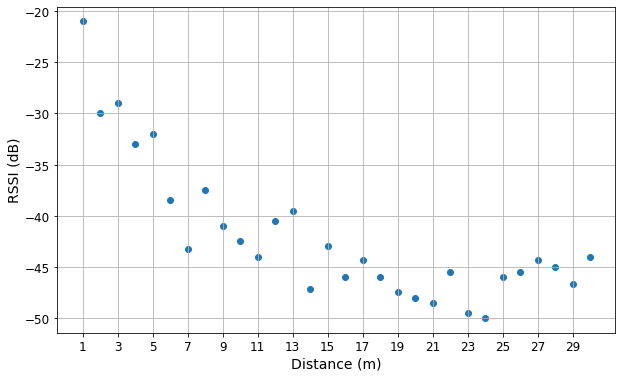

In [4]:
# Show the RSSI behavior in function of the distance
plt.figure(figsize=(10,6))
plt.scatter(data_2_4_Ghz['Distance'], data_2_4_Ghz['RSSI'], label='2.4 GHz')
plt.ylabel('RSSI (dB)')
plt.xlabel('Distance (m)')
plt.xticks(np.arange(1,30,2))
plt.grid()
plt.show()

## Split the data

In [5]:
# Split the data in 3 distances (near, medium, far)
near_data = data_2_4_Ghz[:10]
medium_data = data_2_4_Ghz[10:20]
far_data = data_2_4_Ghz[20:30]

## Optimized Path Loss Equation

In [10]:
# Function to calculate the RSSI using the Optimized Path Loss Equation
def calculate_rssi_with_optimized_path_loss_function(frequency, d):

    # Transmit power
    Pt = 10 * np.log10(250) + 5 + 1
    # Reference distance
    d0 = 1

    # Free-space path loss model
    Ao = 32.44+20*np.log10(d0/1000)+20*np.log10(frequency)

    # Optimized coefficients
    n = 1.7143
    k = 13.3156

    # Optimized Path Loss
    L = Ao + 10*n*np.log10(d/d0) + k

    # Received Power According to the Optimized Path Loss
    Pr = Pt - L
    
    print(Pr)

# Distances
d = np.linspace(1,30,30)

# Frequency
frequency = 2412
# Calculate RSSI using optimized 
calculate_rssi_with_optimized_path_loss_function(frequency, d)


[-23.42374598 -28.5843032  -31.60303565 -33.74486041 -35.40618877
 -36.76359287 -37.91126168 -38.90541763 -39.78232532 -40.56674598
 -41.27634078 -41.92415008 -42.52007687 -43.0718189  -43.58547844
 -44.06597485 -44.51733184 -44.94288254 -45.34541896 -45.7273032
 -46.09055135 -46.436898   -46.76784628 -47.0847073  -47.38863155
 -47.68063409 -47.96161499 -48.23237611 -48.49363486 -48.74603565]
